<a href="https://colab.research.google.com/github/crystaljwang/tm11005_aip/blob/main/AIP_Segmentation2_Atlases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1: Atlas-based Segmentation
 
In the lecture there were two types of atlases introduced: topological and probabilistic. In this tutorial you will work with both and you will learn several strategies to visualize atlases.
 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imread_collection
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Additional libraries
from matplotlib import cm

In [3]:
# Run this to use from colab environment
!git clone https://github.com/crystaljwang/tm11005_aip

Cloning into 'tm11005_aip'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), 7.11 MiB | 2.60 MiB/s, done.


## MRI Brain Data

The original MRI brain dataset contains brain image data of 30 subjects together with the probability maps for 95 region labels (marking different structures within brains, see the ```"Hammers_mith_atlases_n30r95_label_indices_SPM12_20170315.xml"``` file (as a text file). For time reasons we reduced the set to the brain image data of two subjects.

In the following example, we will load the data for subject no. 01, for whom the original MRI data is kept in folder ```brain_images/subjects/a01``` and the corresponding segmentation is in folder ```brain_images/subjects/a01-seg```.

In [4]:
# First we load the images in an image_collection
!unzip brain_images.zip;

Archive:  brain_images.zip
   creating: brain_images/atlases/
   creating: brain_images/atlases/MaxProbMap/
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z001.png  
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z002.png  
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z003.png  
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z004.png  
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z005.png  
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z006.png  
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z007.png  
  inflating: brain_images/atlases/MaxProbMap/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12_t001_z008.png  
  inflating:

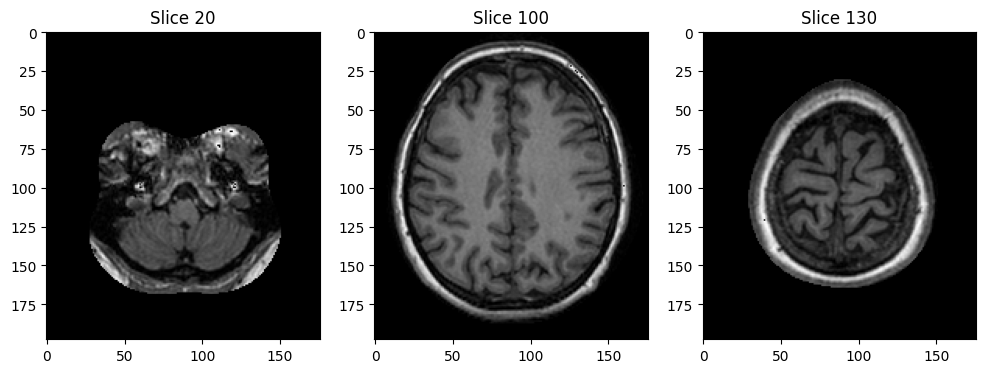

In [5]:
# Let us visualize slices 20, 100, and 130
a01_data = imread_collection('brain_images/subjects/a01/*')                        
plt.rcParams['figure.figsize'] = [12, 8] # bump up the figure size a bit
fig, axs = plt.subplots(1,3)
axs[0].imshow(a01_data[19], cmap='gray')
axs[0].set_title('Slice 20')

axs[1].imshow(a01_data[99], cmap='gray')
axs[1].set_title('Slice 100')

axs[2].imshow(a01_data[129], cmap='gray')
axs[2].set_title('Slice 130')

plt.show()

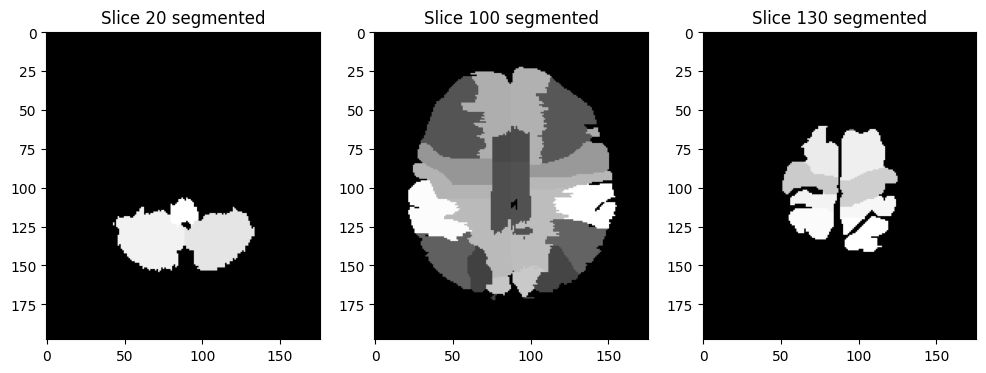

In [6]:
# Now, load the corresponding segmentation results (the image/atlas that contains labels for the corresponding 95 regions)

a01_seg_data = imread_collection('brain_images/subjects/a01-seg/*')           

fig, axs = plt.subplots(1,3)
axs[0].imshow(a01_seg_data[19], cmap = 'gray')
axs[0].set_title('Slice 20 segmented')

axs[1].imshow(a01_seg_data[99], cmap='gray')
axs[1].set_title('Slice 100 segmented')

axs[2].imshow(a01_seg_data[129], cmap='gray')
axs[2].set_title('Slice 130 segmented')

plt.show()

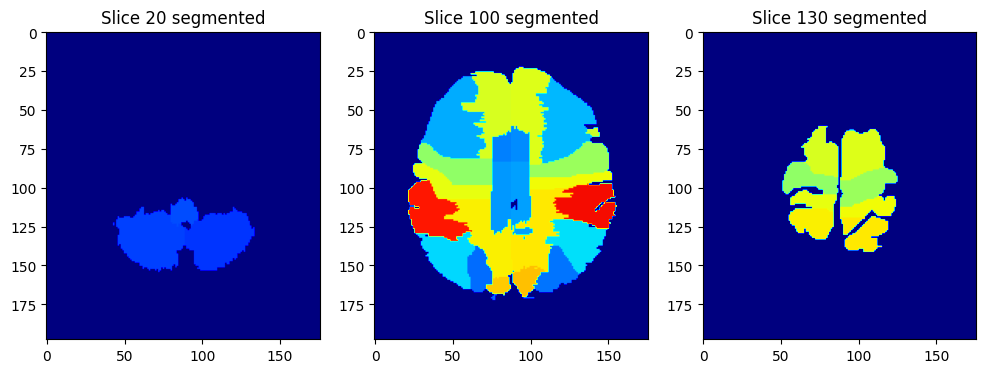

In [7]:
# In order to visualize the results of segmentation using different colors (and not as grayscale values) one needs to use a
# colormap that maps the 95 region/label values into different colors. To do this we add a maximum value (vmax) to the 'jet'
# colormap, this ensures that pyplot doesn't normalize the colors like it did in the figures above.

fig, axs = plt.subplots(1,3)
axs[0].imshow(a01_seg_data[19], cmap = 'jet', vmax = 95)
axs[0].set_title('Slice 20 segmented')

axs[1].imshow(a01_seg_data[99], cmap = 'jet', vmax = 95)
axs[1].set_title('Slice 100 segmented')

axs[2].imshow(a01_seg_data[129], cmap = 'jet', vmax = 95)
axs[2].set_title('Slice 130 segmented')

plt.show()

## Question 1: 

What type of image data do we have, T1, T2, etc?

In [ ]:
# Answer to Question 1

# T1 (CSF is black)

## Question 2:

Using the information in the text file ```'Hammers_mith_atlases_n30r95_label_indices_SPM12_20170315.xml'```
provide the names of all the regions visible in slice 20 and slice 130. 

_(Hint: check the NumPy function unique)._

In [8]:
# Answer to Question 2                  

regions_slice20 = np.unique(a01_data[19])
regions_slice130 = np.unique(a01_data[129])

with open('tm11005_aip/data/Hammers_mith_atlases_n30r95_label_indices_SPM12_20170315.xml') as text:
    names = text.readlines()

# for region in regions_slice20:
#     print(names[region])

# for region in regions_slice130:
#     print(names[region])

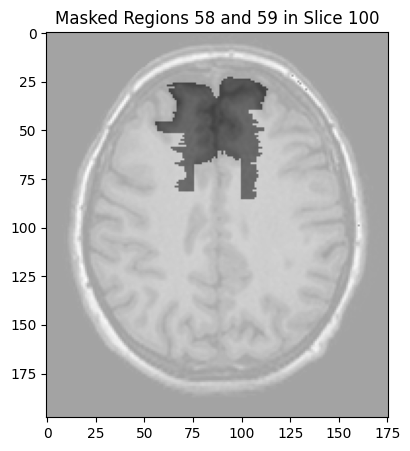

In [9]:
# To highlight some specific regions of interest (with a specified number, for
# example 58 and 59), one can do the following: 
# make a mask of the image except the regions 58 and 59 and show the mask and 
# the image on top of each other

mask = (lambda x: 1 - ((x == 58) | (x == 59)))(a01_seg_data[99]) 

plt.rcParams['figure.figsize'] = [10, 5]

plt.imshow(a01_data[99], alpha = 0.6, cmap = 'gray')
plt.imshow(mask, alpha = 0.4, cmap = 'gray')
plt.title('Masked Regions 58 and 59 in Slice 100')
plt.show()

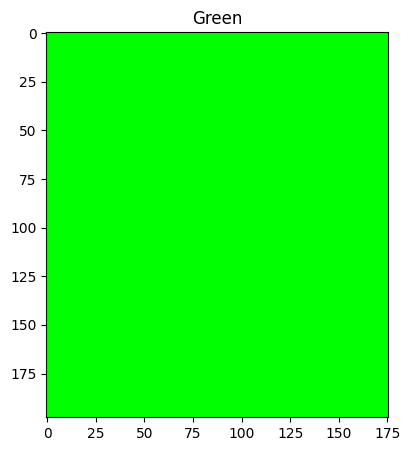

In [10]:
# To color the desired region in the MRI image data with some specific color we first 
# have to create an RBG image. An RGB image is an array that contains 3 color
# channels (R-red, G-green, B-blue). Let us make an all-green image

mask_green = np.zeros((mask.shape[0], mask.shape[1], 3))
mask_green[:,:,1] = np.ones(mask.shape)

plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(mask_green)
plt.title('Green')
plt.show()

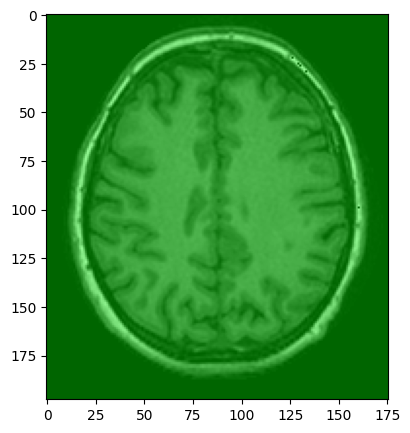

In [11]:
# Now we can display the original image first, and then put on top of it
# the all-green image, but also set the transparency of that all-green image to 0.4, 
# so the real data is still visible

plt.imshow(a01_data[99], cmap= 'gray')
plt.imshow(mask_green, alpha = 0.4)
plt.show()

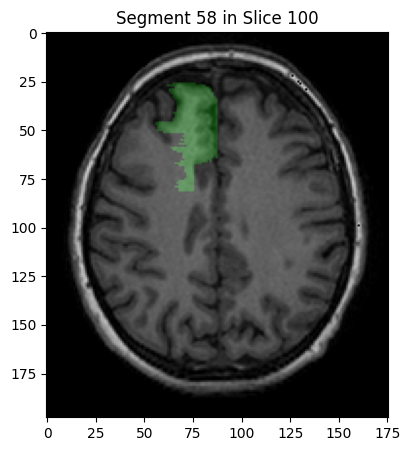

In [12]:
# Lastly, we can try to color in green only the desired
# region, for example no. 58:

# Create all green image
mask_green = np.zeros((mask.shape[0], mask.shape[1], 3))
mask_green[:,:,1] = np.ones(mask.shape)

# Now, create a mask for region 58, so set all the pixels in 'mask_green'
# that do not correspond to region 58 to zero

mask = a01_seg_data[99].copy()
mask[mask == 58] = 1
mask[mask != 1] = 0

mask_green[:,:,1] = mask

plt.imshow(a01_data[99], cmap= 'gray')
plt.imshow(mask_green, alpha = 0.2)
plt.title('Segment 58 in Slice 100')
plt.show()

# Exercise 2.1: Visualize Segmentation Result

* Load the MRI image volume for patient 04 which is located in the folder ```'images/subjects/a04'``` and the corresponding segmentation results 'a04-seg'


* Visualize one of the slices from the middle of the volume (one of the slices in the range of [80,110]), and the corresponding segmentation), which clearly contain several brain regions.


* Pick up 3 regions from that slice, color them using 3 colors. For those 3 regions, output the size (in voxels) which they occupy in the selected slice. Out of those three regions, the region with the largest size in that slice should be colored red and the smallest region (in that slice) should be colored in green. The one that is left should be blue.  

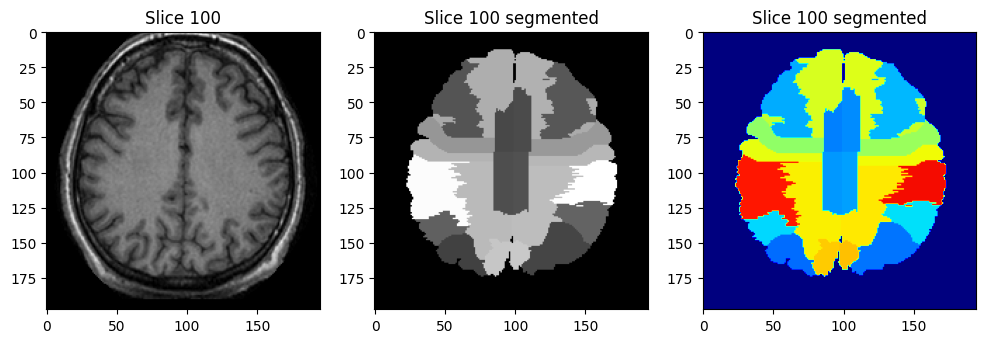

{58: 1377, 59: 1000, 62: 1619}
The region with the largest size (1619 voxels) is segment: 62
The region with the smallest size (1000 voxels) is segment: 59


In [13]:
# Answer Exercise 2.1
a04_data = imread_collection('brain_images/subjects/a04/*')     
a04_seg_data = imread_collection('brain_images/subjects/a04-seg/*')                     

plt.rcParams['figure.figsize'] = [12, 8]  # bump up the figure size a bit
fig, axs = plt.subplots(1,3)
axs[0].imshow(a04_data[99], cmap='gray')
axs[0].set_title('Slice 100')

axs[1].imshow(a04_seg_data[99], cmap='gray')
axs[1].set_title('Slice 100 segmented')

axs[2].imshow(a04_seg_data[99], cmap = 'jet', vmax = 95)
axs[2].set_title('Slice 100 segmented')

plt.show()

# Get the largest segment
dicts = {}
region_size = []
regions = [58, 59, 62]
for index, region in enumerate(regions):
    mask = a04_seg_data[99].copy()
    mask[mask == region] = 1
    mask[mask != 1] = 0
    region_size.append(np.sum(mask))
    dicts[region] = region_size[index]

print(dicts)
print(f'The region with the largest size ({dicts[max(dicts, key=dicts.get)]} voxels) is segment: {max(dicts, key=dicts.get)}')
print(f'The region with the smallest size ({dicts[min(dicts, key=dicts.get)]} voxels) is segment: {min(dicts, key=dicts.get)}')

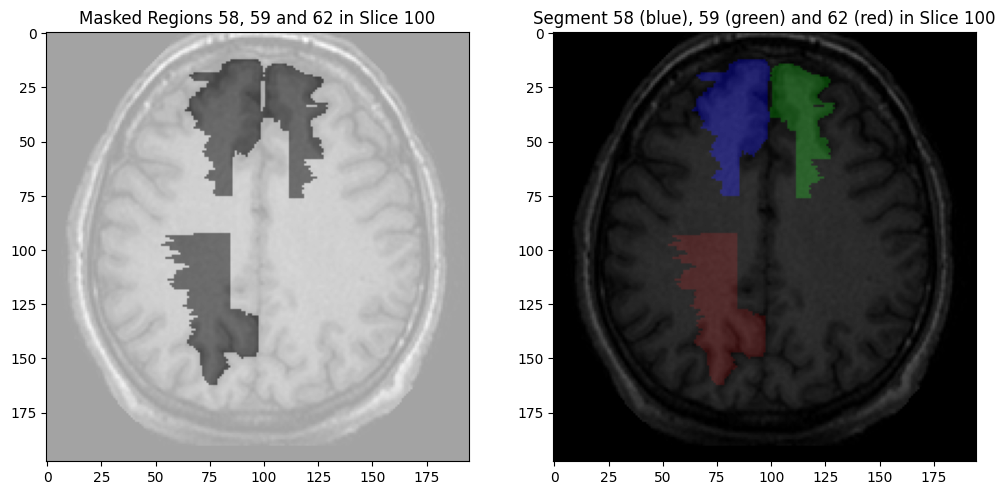

In [14]:
# Answer Exercise 2.1 (continued)

# Image with grayscale mask to show regions 58, 59 and 62
mask = (lambda x: 1 - ((x == 58) | (x == 59) | (x == 62)))(a04_seg_data[99]) 

plt.rcParams['figure.figsize'] = [12, 8]
fig, axs = plt.subplots(1,2)
axs[0].imshow(a04_data[99], alpha = 0.6, cmap = 'gray')
axs[0].imshow(mask, alpha = 0.4, cmap = 'gray')
axs[0].set_title('Masked Regions 58, 59 and 62 in Slice 100')

# Create RGB images

mask = a04_seg_data[99].copy()
mask_red = np.zeros((mask.shape[0], mask.shape[1], 3))
mask_red[:,:,0] = np.ones(mask.shape)
mask[mask == 62] = 1
mask[mask != 1] = 0
mask_red[:,:,0] = mask

mask = a04_seg_data[99].copy()
mask_green = np.zeros((mask.shape[0], mask.shape[1], 3))
mask_green[:,:,1] = np.ones(mask.shape)
mask[mask == 59] = 1
mask[mask != 1] = 0
mask_green[:,:,1] = mask

mask = a04_seg_data[99].copy()
mask_blue = np.zeros((mask.shape[0], mask.shape[1], 3))
mask_blue[:,:,2] = np.ones(mask.shape)
mask[mask == 58] = 1
mask[mask != 1] = 0
mask_blue[:,:,2] = mask

axs[1].imshow(a04_data[99], cmap= 'gray')
axs[1].imshow(mask_red, alpha = 0.3)
axs[1].imshow(mask_green, alpha = 0.3)
axs[1].imshow(mask_blue, alpha = 0.3)
axs[1].set_title('Segment 58 (blue), 59 (green) and 62 (red) in Slice 100')
plt.show()

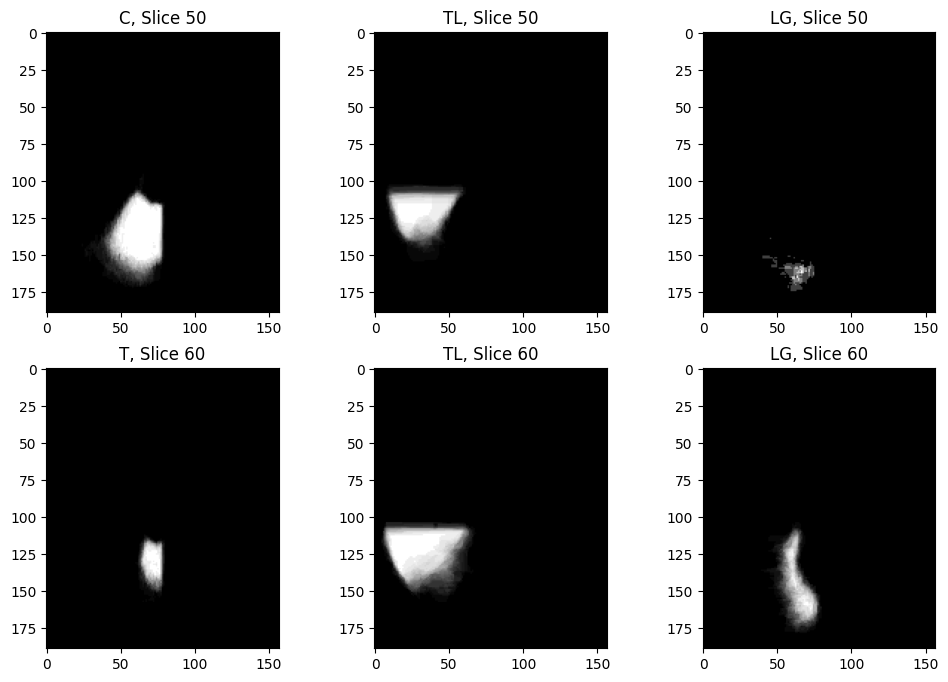

In [15]:
# Probabilistic Atlases

# Consider the probabilistic atlases given in the folder 
# 'brain_images/regions'. The files contain archived files of
# probability maps.

# Load the probability maps that correspond to the right 
# cerebellum (C), posterior temporal lobe (TL),
# and lingual gyrus (LG)

data_probC  = imread_collection(f"brain_images/regions/probmap-full-r17-cerebellum_R/*")
data_probTL = imread_collection(f"brain_images/regions/probmap-full-r31-TL_posterior_temporal_lobe_R/*")
data_probLG = imread_collection(f"brain_images/regions/probmap-full-r65-OL_lingual_gyrus_R/*")

n_slice = 49

fig, axs = plt.subplots(2,3)
axs[0,0].imshow(data_probC[n_slice], cmap='gray')
axs[0,0].set_title(f"C, Slice {n_slice + 1}")

axs[0,1].imshow(data_probTL[n_slice], cmap='gray')
axs[0,1].set_title(f"TL, Slice {n_slice + 1}")

axs[0,2].imshow(data_probLG[n_slice], cmap='gray')
axs[0,2].set_title(f"LG, Slice {n_slice + 1}")

n_slice = 59

axs[1,0].imshow(data_probC[n_slice], cmap='gray')
axs[1,0].set_title(f"T, Slice {n_slice + 1}")

axs[1,1].imshow(data_probTL[n_slice], cmap='gray')
axs[1,1].set_title(f"TL, Slice {n_slice + 1}")

axs[1,2].imshow(data_probLG[n_slice], cmap='gray')
axs[1,2].set_title(f"LG, Slice {n_slice + 1}")
plt.show()

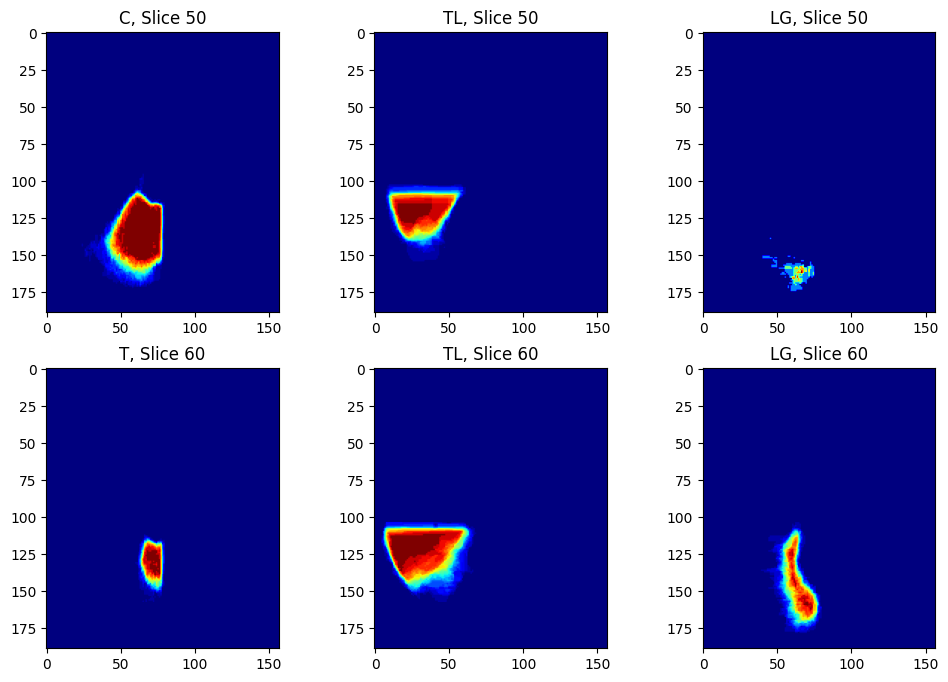

In [16]:
# The same images can be visualized using the heatmap representation

n_slice = 49

fig, axs = plt.subplots(2,3)
axs[0,0].imshow(data_probC[n_slice], cmap='jet')
axs[0,0].set_title(f"C, Slice {n_slice + 1}")

axs[0,1].imshow(data_probTL[n_slice], cmap='jet')
axs[0,1].set_title(f"TL, Slice {n_slice + 1}")

axs[0,2].imshow(data_probLG[n_slice], cmap='jet')
axs[0,2].set_title(f"LG, Slice {n_slice + 1}")

n_slice = 59

axs[1,0].imshow(data_probC[n_slice], cmap='jet')
axs[1,0].set_title(f"T, Slice {n_slice + 1}")

axs[1,1].imshow(data_probTL[n_slice], cmap='jet')
axs[1,1].set_title(f"TL, Slice {n_slice + 1}")

axs[1,2].imshow(data_probLG[n_slice], cmap='jet')
axs[1,2].set_title(f"LG, Slice {n_slice + 1}")

plt.show()

# Exercise 2.2: Visualize overlap between regions

* Check if any of those 3 probabilistic atlases overlap at slices 50 or 60 and display the results of possible overlap (or no overlap) between the regions C and TL, TL and LG, LG and C in the form of 2-by-3 subplots.

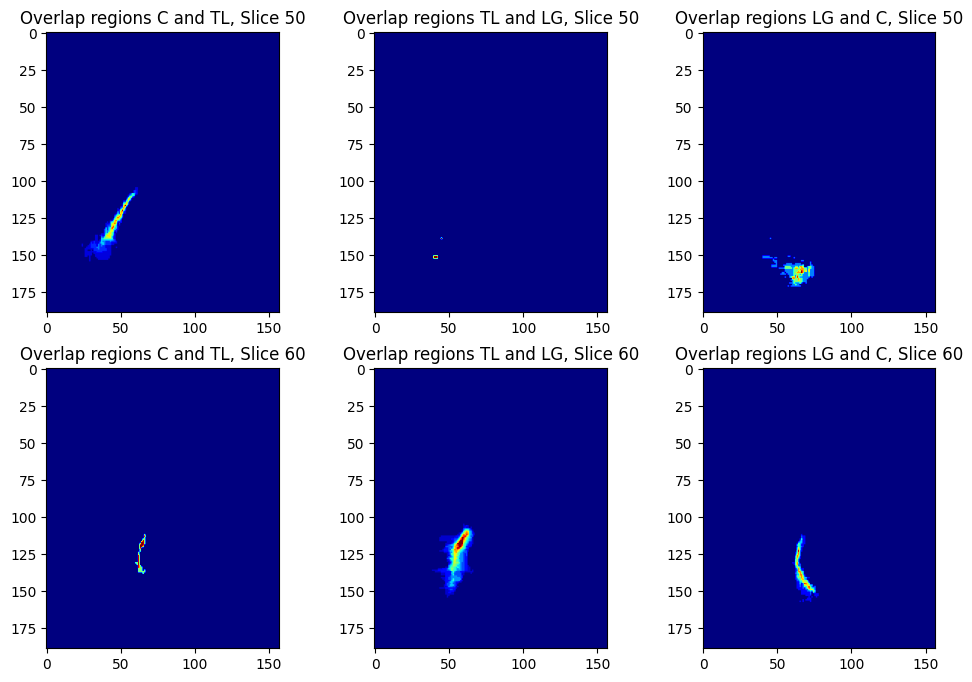

In [24]:
# Answer Exercise 2.2

n_slice = 49

fig, axs = plt.subplots(2,3)
axs[0,0].imshow(np.minimum(data_probC[n_slice],data_probTL[n_slice]), cmap='jet')
axs[0,0].set_title(f"Overlap regions C and TL, Slice {n_slice + 1}")

axs[0,1].imshow(np.minimum(data_probTL[n_slice],data_probLG[n_slice]), cmap='jet')
axs[0,1].set_title(f"Overlap regions TL and LG, Slice {n_slice + 1}")

axs[0,2].imshow(np.minimum(data_probLG[n_slice],data_probC[n_slice]), cmap='jet')
axs[0,2].set_title(f"Overlap regions LG and C, Slice {n_slice + 1}")

n_slice = 59

axs[1,0].imshow(np.minimum(data_probC[n_slice],data_probTL[n_slice]), cmap='jet')
axs[1,0].set_title(f"Overlap regions C and TL, Slice {n_slice + 1}")

axs[1,1].imshow(np.minimum(data_probTL[n_slice],data_probLG[n_slice]), cmap='jet')
axs[1,1].set_title(f"Overlap regions TL and LG, Slice {n_slice + 1}")

axs[1,2].imshow(np.minimum(data_probLG[n_slice],data_probC[n_slice]), cmap='jet')
axs[1,2].set_title(f"Overlap regions LG and C, Slice {n_slice + 1}")
plt.show()

# Exercise 2.3: Visualize maximum probability

* Create and visualize the maximum probability atlas that corresponds to those 3 regions. 
- Use the ```colormap(jet)``` extended with black for the background to be able to show the region with the highest probability. 
- Use ```stack``` to stack the three probabilistic atlassses.
- Use ```argmax``` (over the same axis in which you stacked the atlasses) to locate the indices of the max value of the stack (since Python starts counting at 0, this is 0, 1 or 2).
- For the background the index will become 0. Also the index of the structure in your first stacked region will become 0.
- You can discriminate between the background and index 0 of the first structure by using the ```amax``` function, this will be 0 for the background, but not for the voxels of the first structure.


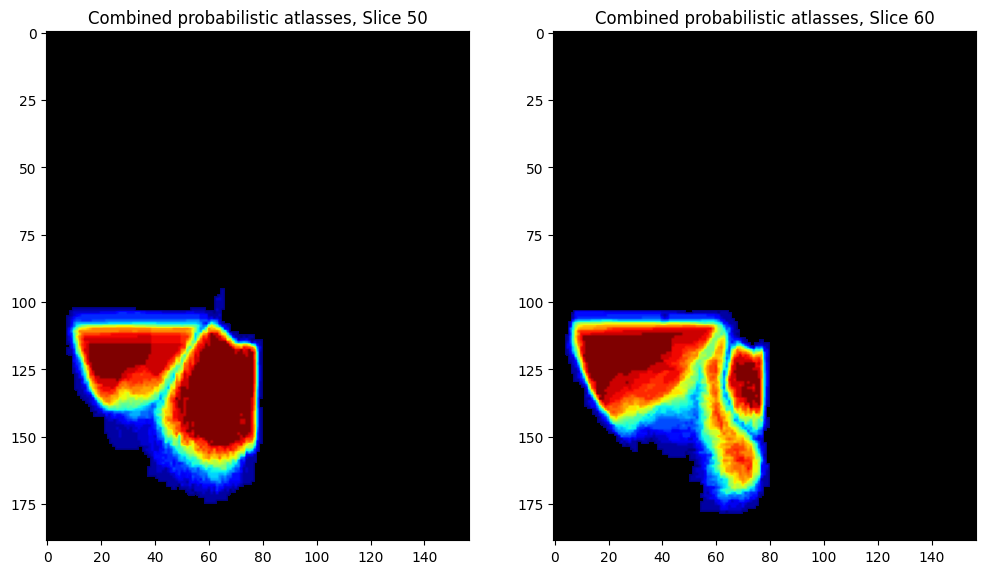

In [75]:
# Answer Exercise 2.3

n_slice = 49
cmap = plt.get_cmap('jet')
cmap.set_under('black')

combi = data_probC[n_slice],data_probTL[n_slice],data_probLG[n_slice]
data_prob_combi = np.stack(combi,axis=2)  # stack along z-axis

max_z_combi = np.argmax(data_prob_combi,axis=2)
max_prob_combi = np.amax(data_prob_combi,axis=2)
max_z_combi[max_prob_combi == 0] = 0

fig, axs = plt.subplots(1,2)
axs[0].imshow(max_prob_combi, cmap=cmap, vmin=10**-6)
axs[0].set_title(f"Combined probabilistic atlasses, Slice {n_slice + 1}")

n_slice = 59
combi = data_probC[n_slice],data_probTL[n_slice],data_probLG[n_slice]
data_prob_combi = np.stack(combi,axis=2)  # stack along z-axis

max_z_combi = np.argmax(data_prob_combi,axis=2)
max_prob_combi = np.amax(data_prob_combi,axis=2)
max_z_combi[max_prob_combi == 0] = 0

axs[1].imshow(max_prob_combi, cmap=cmap, vmin=10**-6)
axs[1].set_title(f"Combined probabilistic atlasses, Slice {n_slice + 1}")

plt.show()